In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import numpy as np
import pandas as pd

In [2]:
# Section I : Data Loading
# Part I : Load the dataset into the notebook
# Part II : Explore and make note of Attribute Information from UCI
# Part III : What is the significance of the y column in the dataset and what are the value counts of the y column?
# Part IV : What is the ratio of the two classes ? Are they balanced ? HOW MANY 1 AND 0 ARE IN Y
data = pd.read_csv("portu_banking_final.csv")
dfd = pd.read_csv("portu_banking_final.csv")


C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#  Explore and make note of Attribute Information from UCI

# DESCRIBE INFO SHAPE MISSING VALUES 

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
# Part III : What is the significance of the y column in the dataset and what are the value counts of the y column?
# Part IV : What is the ratio of the two classes ? Are they balanced ? HOW MANY 1 AND 0 ARE IN Y
data.groupby(data.columns.tolist(),as_index=False).size()
data['y'].value_counts()
# no it is not BALANCED

0    36548
1     4640
Name: y, dtype: int64

In [6]:
# Section II : Data Cleaning
# Since this is real world data , A good practice is to make sure the dataset is devoid of any nuances

# Part I : Get the dtypes of all the columns of our dataset
# Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors
# Part III : Make note of the deviation in the dataset compared to the description provided by UCI
# Part IV : Using Data Cleaning principles you learned from Pandas Tutorial) figure out the best ways to get rid of the dirty data 
# Part V : Print the cleaned data

In [7]:
data.info()
# Part I : Get the dtypes of all the columns of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [8]:
data.age.unique()
# Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [9]:
# Part III : Make note of the deviation in the dataset compared to the description provided by UCI???????

In [10]:
data.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [11]:
# Part IV : Using Data Cleaning principles you learned from Pandas Tutorial) figure out the best ways to get rid of the dirty data 
data['age'] =  data['age'].replace({"45-50":"47",'25-30':'28' , '35-30':'33' ,'18-25':'22',"30-35":"33",'35-40':'38', '30-40':'35', '20-25':'22','20-40':'30',"30-35":'33','50-55':'52','30-32':'31'})

In [12]:
data.age.unique()
# Part V : Print the cleaned data

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '25', '57', '63', '58', '60', '64', '51', '23', '20', '74',
       '80', '61', '62', '75', '21', '82', '77', '22', '70', '76', '73',
       '66', '71', '19', '79', '88', '65', '67', '81', '18', '84', '69',
       '98', '85', '83', '78', '92', '86', '94', '17', '91', '89', '87',
       '95', 56, 39, 30, 53, 37, 22, 45, 31, 24, 50, 58, 33, 27, 28, 32,
       51, 41, 49, 43, 44, 35, 29, 26, 57, 25, 42, 48, 46, 67, 38, 34, 54,
       40, 23, 47, 62, 75, 55, 36, 52, 59, 78, 70, 60, 20, 66, 61, 21, 88,
       18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69, 81, 64,
       77, 74, 85, 82], dtype=object)

In [13]:
data['age'] = data['age'].astype(int)

In [14]:
data['age']

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: int32

In [15]:
data['job']

0        blue-collar
1         technician
2         management
3           services
4            retired
            ...     
41183        retired
41184      housemaid
41185         admin.
41186     technician
41187        student
Name: job, Length: 41188, dtype: object

In [16]:
data['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student', 'MANAGEMENT', 'RETIRED',
       'STUDENT', 'ADMIN.', 'TECHNICIAN', 'BLUE-COLLAR', 'HOUSEMAID',
       'SERVICES', 'UNKNOWN'], dtype=object)

In [17]:
# data['age'] =  data['age'].replace({"45-50":"47",'25-30':'28' , '35-30':'33' ,
data['job'] = data['job'].str.lower()

In [18]:
data['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [19]:
# Section III : Exploring data with Group by
# In this section , we must create some primitive EDA

# Use the groupby function on the mean of the following columns :

# I : y
# II : job
# III : marital
# IV : education

# Make a note of what you learn from the outputs !


In [20]:
data['job']

0        blue-collar
1         technician
2         management
3           services
4            retired
            ...     
41183        retired
41184      housemaid
41185         admin.
41186     technician
41187        student
Name: job, Length: 41188, dtype: object

In [21]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'basic-6y',
       'basic-9y', 'basic-4y', 'illiterate'], dtype=object)

In [22]:
data['default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [23]:
data['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [24]:
data['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [25]:
data['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [26]:
data['marital'].unique()


array(['married', 'single', 'divorced', 'D', 'unknown', 'S', 'M'],
      dtype=object)

In [27]:
data['marital'].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [28]:
data['marital'] = data['marital'].replace({'married':"M", 'single':'S', 'divorced':'D', 'unknown':'M'})


In [29]:
data['marital'].head

<bound method NDFrame.head of 0        M
1        M
2        S
3        M
4        M
        ..
41183    M
41184    M
41185    S
41186    M
41187    S
Name: marital, Length: 41188, dtype: object>

In [30]:
data['marital'].unique()

array(['M', 'S', 'D'], dtype=object)

In [31]:
data['month'].unique()

array(['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep',
       'dec'], dtype=object)

In [32]:
data['day_of_week'].unique()

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

In [33]:
data['duration'].unique()

array([ 210,  138,  339, ..., 2260, 1662, 1490], dtype=int64)

In [34]:
data['campaign'].unique()

array([ 1,  3,  2,  8,  5,  4, 25, 11, 12, 18,  6, 17,  7, 20, 16, 14, 10,
        9, 19, 29, 13, 40, 15, 34, 22, 24, 41, 21, 23, 39, 28, 27, 31, 35,
       26, 30, 32, 43, 33, 42, 56, 37], dtype=int64)

In [35]:
data['pdays'].unique()

array([9.990e+02, 6.000e+00, 3.000e+00, 9.999e+03, 2.000e+00, 4.000e+00,
       1.600e+01, 0.000e+00, 5.000e+00, 1.100e+01, 1.400e+01, 1.300e+01,
       9.000e+00, 1.500e+01, 1.700e+01, 1.200e+01, 2.600e+01, 7.000e+00,
       1.900e+01, 1.000e+01, 1.000e+00, 1.800e+01, 8.000e+00, 2.000e+01,
       2.100e+01, 2.200e+01, 2.500e+01, 2.700e+01])

In [36]:
data['poutcome'].unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

In [37]:
data['cons_price_idx'].unique()

array([93.444, 93.2  , 94.055, 93.075, 92.201, 93.918, 92.893, 92.963,
       93.994, 94.465, 93.798, 92.431, 92.649, 92.843, 92.469, 93.749,
       93.876, 94.027, 94.199, 94.601, 92.713, 94.767, 93.369, 94.215,
       92.379, 92.756])

In [38]:
data['cons_conf_idx'].unique()

array([-36.1, -42. , -39.8, -47.1, -31.4, -42.7, -46.2, -40.8, -36.4,
       -41.8, -40.4, -26.9, -30.1, -50. , -33.6, -34.6, -40. , -38.3,
       -37.5, -49.5, -33. , -50.8, -34.8, -40.3, -29.8, -45.9])

In [39]:
data['euribor3m'].unique()

array([4.963, 4.021, 0.729, 1.405, 0.869, 4.961, 1.327, 1.313, 1.266,
       1.41 , 4.864, 4.964, 4.965, 1.291, 4.96 , 4.962, 1.365, 4.86 ,
       4.967, 4.968, 1.344, 0.754, 1.299, 1.268, 1.334, 4.857, 0.715,
       4.966, 4.076, 1.354, 4.959, 4.958, 4.859, 1.27 , 4.856, 1.811,
       1.029, 1.259, 4.866, 0.883, 4.858, 1.56 , 0.74 , 4.245, 4.12 ,
       0.659, 1.415, 0.73 , 1.072, 4.153, 0.716, 0.682, 0.905, 1.281,
       4.865, 4.957, 0.914, 0.849, 0.876, 0.644, 4.855, 1.392, 1.25 ,
       0.873, 0.881, 0.942, 0.9  , 0.692, 1.244, 1.264, 4.191, 0.882,
       1.035, 0.742, 0.879, 1.032, 0.719, 5.   , 0.724, 4.97 , 0.646,
       1.26 , 1.479, 0.87 , 1.423, 1.498, 0.803, 0.714, 1.406, 0.702,
       0.827, 0.71 , 4.955, 0.653, 4.947, 0.835, 1.531, 0.735, 0.743,
       1.262, 0.944, 1.028, 0.663, 0.731, 0.699, 1.435, 1.538, 0.846,
       0.884, 1.453, 1.445, 0.635, 0.885, 0.854, 0.748, 0.643, 0.728,
       0.893, 0.861, 0.706, 1.025, 4.912, 0.668, 0.899, 1.085, 0.654,
       0.88 , 0.781,

In [40]:
data['nr_employed'].unique()

array([5228.1, 5195.8, 4991.6, 5099.1, 5076.2, 5191. , 5017.5, 5008.7,
       4963.6, 5023.5, 5176.3])

In [41]:
data['y'].unique()

array([0, 1], dtype=int64)

In [42]:
# 0   age             41188 non-null  object 
#  1   job             41188 non-null  object 
#  2   marital         41188 non-null  object 
#  3   education       41188 non-null  object 
#  4   default         41188 non-null  object 
#  5   housing         41188 non-null  object 
#  6   loan            41188 non-null  object 
#  7   contact         41188 non-null  object 
#  8   month           41188 non-null  object 
#  9   day_of_week     41188 non-null  object 
#  10  duration        41188 non-null  int64  
#  11  campaign        41188 non-null  int64  
#  12  pdays           41188 non-null  float64
#  13  previous        41188 non-null  int64  
#  14  poutcome        41188 non-null  object 
#  15  emp_var_rate    41188 non-null  float64
# #  16  cons_price_idx  41188 non-null  float64
#  17  cons_conf_idx   41188 non-null  float64
#  18  euribor3m       41188 non-null  float64
#  19  nr_employed     41188 non-null  float64
#  20  y               41188 non-null  int64  
# dtypes: float64(6), int64(4), object(11)
# memory usage: 6.6+ MB

In [43]:
data['marital'].unique()

array(['M', 'S', 'D'], dtype=object)

In [44]:
data['marital'] = data['marital'].replace({"D": "S"})
# data['age'] =  data['age'].replace({"45-50":"47",'25-30':'28' 

In [45]:
data['marital'].unique()

array(['M', 'S'], dtype=object)

In [46]:
data['marital']

0        M
1        M
2        S
3        M
4        M
        ..
41183    M
41184    M
41185    S
41186    M
41187    S
Name: marital, Length: 41188, dtype: object

In [47]:
# create dummy variables  # this creates columns M AND S FROM marital after it has been encoded
encoded_columns = pd.get_dummies(data.marital)

encoded_columns

,M,S
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
41183,1,0
41184,1,0
41185,0,1
41186,1,0


In [48]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,M,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,M,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,S,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,M,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,M,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,M,high.school,unknown,no,yes,telephone,jun,thu,...,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,M,basic.4y,unknown,no,no,telephone,may,thu,...,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,S,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,M,professional.course,no,no,yes,telephone,oct,tue,...,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [49]:
# dataC.job.unique()

In [50]:
# import preprocessing library from sklearn
from sklearn import preprocessing

# initialize a label encoder 

label_encoder = preprocessing.LabelEncoder()

# fit the data to the label encoder 
data["month"] = label_encoder.fit_transform(data['month'])
data['job'] =  label_encoder.fit_transform(data['job'])
data['education'] =  label_encoder.fit_transform(data['education'])
data['default'] =  label_encoder.fit_transform(data['default'])
data['housing'] =  label_encoder.fit_transform(data['housing'])
data['poutcome'] =  label_encoder.fit_transform(data['poutcome'])
data['contact'] =  label_encoder.fit_transform(data['contact'])
data['loan'] =  label_encoder.fit_transform(data['loan'])

data









# # transfrom the column and save it back into the main DataFrame
# dataset['Club'] = label_encoder.transform(dataset['Club'])
# # chcke the label encoded Club column in the main DataFrame 
# dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,M,3,1,2,0,0,1,thu,...,1,999.0,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,M,10,0,0,0,0,7,fri,...,1,999.0,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,S,9,0,2,0,0,4,thu,...,3,6.0,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,M,6,0,0,0,0,0,fri,...,2,999.0,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,M,3,0,2,0,0,1,fri,...,1,3.0,1,2,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,5,M,6,1,0,2,1,4,thu,...,1,999.0,0,1,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,3,M,3,1,0,0,1,6,thu,...,2,999.0,0,1,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,0,S,9,1,2,2,1,6,wed,...,3,999.0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,9,M,8,0,0,2,1,8,tue,...,2,999.0,0,1,-3.4,92.431,-26.9,0.742,5017.5,0


In [51]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [52]:
data["poutcome"].unique()

array([1, 2, 0])

In [53]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

In [54]:


# data.drop(['M'], axis=1)
# data.drop(['S'], axis=1)
data.drop(['marital'], axis= 1)
dataC = pd.concat([encoded_columns, data], sort=False, axis=1)
dataC

,M,S,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,1,0,44,1,M,3,1,2,0,0,...,1,999.0,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,1,0,53,9,M,10,0,0,0,0,...,1,999.0,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,0,1,28,4,S,9,0,2,0,0,...,3,6.0,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,1,0,39,7,M,6,0,0,0,0,...,2,999.0,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,1,0,55,5,M,3,0,2,0,0,...,1,3.0,1,2,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,0,59,5,M,6,1,0,2,1,...,1,999.0,0,1,1.4,94.465,-41.8,4.866,5228.1,0
41184,1,0,31,3,M,3,1,0,0,1,...,2,999.0,0,1,1.1,93.994,-36.4,4.860,5191.0,0
41185,0,1,42,0,S,9,1,2,2,1,...,3,999.0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
41186,1,0,48,9,M,8,0,0,2,1,...,2,999.0,0,1,-3.4,92.431,-26.9,0.742,5017.5,0


In [55]:
dataC.y.mean()

0.11265417111780131

In [56]:
dataC['y'].mean()

0.11265417111780131

In [57]:
dataC.groupby('y').mean()

,M,S,age,job,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,,,,,,,,,,,
0,0.614644,0.385356,39.910748,3.692405,6.700969,0.223268,1.067664,0.328691,0.390090,4.235882,220.844807,2.633085,985.345135,0.132374,0.913319,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,0.548276,0.451724,40.913147,3.978017,7.093103,0.095474,1.103664,0.317457,0.169612,4.191379,553.191164,2.051724,792.035560,0.492672,1.062284,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [58]:
dataC.groupby('job').mean()

,M,S,age,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,,,,,,,,,,
0,0.505373,0.494627,38.186912,7.722318,0.124064,1.088563,0.349933,0.316254,4.045289,254.312128,2.623489,956.046344,0.189023,0.936385,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
1,0.724119,0.275881,39.555327,4.869138,0.342122,1.043873,0.321158,0.449968,4.511563,264.542360,2.558461,987.105468,0.122542,0.917117,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
2,0.737637,0.262363,41.723214,7.076236,0.206731,1.094780,0.307692,0.412775,4.662088,263.267857,2.535714,987.448489,0.138736,0.911401,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
3,0.735849,0.264151,45.500000,5.083019,0.300943,1.046226,0.317925,0.396226,3.928302,250.454717,2.639623,960.579245,0.137736,0.966038,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
4,0.715458,0.284542,42.360465,8.126197,0.156635,1.043434,0.324555,0.349521,4.582421,257.058140,2.476060,962.647059,0.185021,0.919289,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
5,0.743605,0.256395,62.027326,5.787209,0.228488,1.062791,0.304651,0.284302,4.035465,273.712209,2.476744,897.936047,0.327326,0.958140,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
6,0.639690,0.360310,39.947220,7.548909,0.198452,1.069669,0.302604,0.371569,4.269529,264.142153,2.660802,976.621393,0.143561,0.919071,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
7,0.579491,0.420509,37.926682,6.079617,0.230789,1.058453,0.328294,0.417737,4.463341,258.398085,2.587805,979.974049,0.154951,0.904762,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
8,0.048000,0.952000,25.894857,7.212571,0.118857,1.102857,0.350857,0.233143,4.245714,283.683429,2.104000,840.217143,0.524571,0.948571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [59]:
dataC.groupby('marital').mean()

,M,S,age,job,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,,,,,,,,,,,
M,1,0,42.300384,3.600568,6.495961,0.25140,1.062100,0.326256,0.389835,4.233765,...,2.574776,967.871001,0.155990,0.933261,0.182330,93.596964,-40.272417,3.744447,5171.802531,0.101727
S,0,1,36.504759,3.916255,7.130284,0.14314,1.086588,0.329234,0.327256,4.226391,...,2.556489,956.917244,0.199197,0.925216,-0.073362,93.542744,-40.858375,3.430939,5159.668566,0.129543


In [60]:
dataC.groupby('education').mean()

,M,S,age,job,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,,,,,,,,,,
0,0.583333,0.416667,48.916667,2.666667,0.250000,1.000000,0.333333,0.416667,3.833333,259.750000,4.250000,915.916667,0.250000,0.916667,0.166667,93.747500,-42.225000,3.615083,5167.266667,0.083333
1,0.666667,0.333333,39.833333,3.000000,0.333333,1.000000,0.666667,0.500000,4.333333,222.500000,2.500000,999.000000,0.000000,1.000000,0.766667,93.784667,-39.933333,4.313333,5194.233333,0.000000
2,0.600000,0.400000,44.400000,3.800000,0.300000,1.100000,0.700000,0.500000,5.400000,144.900000,1.600000,999.000000,0.200000,0.800000,0.270000,93.732300,-42.120000,3.716900,5161.490000,0.000000
3,0.774976,0.225024,47.592699,2.706772,0.407301,1.035783,0.326849,0.437320,4.291306,264.842459,2.595821,970.171230,0.146734,0.945485,0.216066,93.658052,-40.234150,3.752162,5170.133117,0.102546
4,0.773841,0.226159,40.449256,2.492126,0.371391,1.040245,0.313211,0.455818,4.594926,264.524497,2.556430,980.319335,0.129484,0.922135,0.229746,93.649709,-41.131015,3.771524,5174.666842,0.082240
5,0.688981,0.311019,39.053190,2.677879,0.269097,1.067440,0.316487,0.428832,4.557249,261.484673,2.533886,979.100249,0.141342,0.914333,0.159056,93.623218,-41.325435,3.697932,5172.311914,0.078376
6,0.543563,0.456437,37.998213,3.955018,0.169417,1.059800,0.326432,0.376984,4.386442,260.886810,2.568576,964.358382,0.185917,0.913295,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
7,0.833333,0.166667,48.500000,2.666667,0.388889,1.111111,0.333333,0.166667,3.277778,276.777778,2.277778,943.833333,0.111111,1.000000,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
8,0.603090,0.396910,40.079725,7.013351,0.154301,1.106428,0.326340,0.336639,4.007248,252.533855,2.586115,962.482548,0.163075,0.938966,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485


In [61]:
# Section III : Exploratory Data Analysis
# Let us put Matplotlib to use!

# Part I : Create bar graphs to the frequency of purchase with respect to the job , martial etc

# Part II : Also create stacked bars to same data columns with respect to
# Part III : Explore the age column using a histogram and note down your observations

In [62]:
# Part I : Create bar graphs to the frequency of purchase with respect to the job , martial etc
# import matplotlib.pyplot as plt
# dataC.plot(x='poutcome',y=['job','marital'],kind='bar') # figsize=(16,16)
# plt.show() TOO HEAVY

In [63]:
# this is how you count the missing values per column
# Q2 Explore the data for outliers and missing values.
# bikeData.isna().sum()
dataC.isna().sum()

M                 0
S                 0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [64]:
dataC.columns

Index(['M', 'S', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='M'>

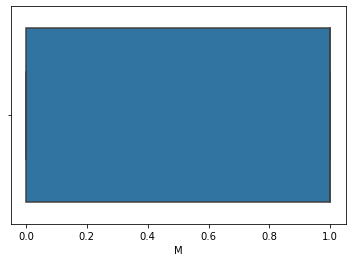

In [65]:
#  FOR OUTLIERS
# import seaborn as sns
# sns.boxplot(bikeData['Rented Bike Count'])

import seaborn as sns 
sns.boxplot(dataC['M'])


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job'>

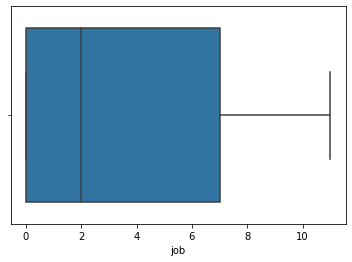

In [66]:
sns.boxplot(dataC['job'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

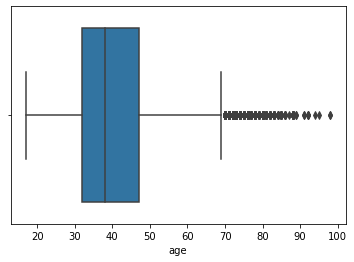

In [67]:
sns.boxplot(dataC['age'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education'>

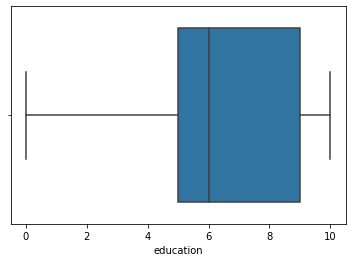

In [68]:
sns.boxplot(dataC['education'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default'>

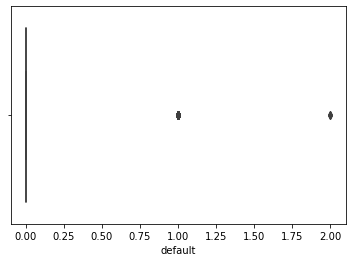

In [69]:
sns.boxplot(dataC['default'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default'>

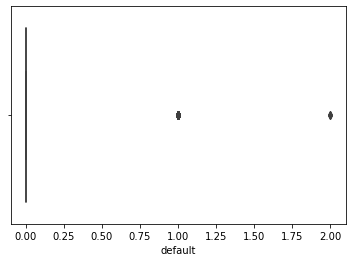

In [70]:
sns.boxplot(dataC['default'])

In [71]:
# Index(['M', 'S', 'age', 'job', 'marital', 'education', 'default', 'housing',
#        'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
#        'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
#        'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
#       dtype='object')

In [72]:
# Section IV : Categorical Variable Encoding
# Part I : Create dummy variables for your categorial variables
# part II : Explore your new dataset with these new dummy variables !


In [73]:
dfd.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [74]:
dfd['marital'].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [75]:
# df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
# print(df)
dfd['marital'].replace({'M':'married', "D":"single", "S":"single"}, inplace= True)

In [76]:
dfd['duration'].value_counts()

85      170
90      170
136     168
73      167
124     164
       ... 
1594      1
1530      1
2231      1
1306      1
2015      1
Name: duration, Length: 1544, dtype: int64

In [77]:
dfd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [78]:
len(dfd.columns)

21

In [79]:
# Part IV : Using Data Cleaning principles you learned from Pandas Tutorial) figure out the best ways to get rid of the dirty data 
dfd['age'] =  dfd['age'].replace({"45-50":"47",'25-30':'28' , '35-30':'33' ,'18-25':'22',"30-35":"33",'35-40':'38', '30-40':'35', '20-25':'22','20-40':'30',"30-35":'33','50-55':'52','30-32':'31'})

In [80]:
W  = pd.get_dummies(dfd, columns = ["job","marital",'education','default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign','poutcome'])

In [81]:
W.columns

Index(['age', 'duration', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       ...
       'campaign_37', 'campaign_39', 'campaign_40', 'campaign_41',
       'campaign_42', 'campaign_43', 'campaign_56', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object', length=117)

In [82]:
# W['poutcome'].value_counts()

In [83]:
W.head()

,age,duration,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,0,0,0,0,0,0,0,1,0
1,53,138,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,...,0,0,0,0,0,0,0,0,1,0
2,28,339,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1,...,0,0,0,0,0,0,0,0,0,1
3,39,185,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,...,0,0,0,0,0,0,0,0,1,0
4,55,137,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1,...,0,0,0,0,0,0,0,0,0,1


In [84]:
from sklearn.linear_model import LogisticRegression

# Section V : Preliminary Training
# Part I : Import your Logisitc Regression libraries
# Part II : Split your train and test dataset and train on the data
# Part III : Make note of the classification report and other metrics

In [85]:
# X = feature values, all the columns except the species column
x = W.drop(['y'],axis=1)
display(x)
# y = target values, only the species column
y = W['y']
display(y)

print(x)
print(y)

# x = W.iloc[:,:-1]
# display(x)

,age,duration,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_ADMIN.,...,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,0,0,0,0,0,0,0,1,0
1,53,138,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,...,0,0,0,0,0,0,0,0,1,0
2,28,339,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,0,...,0,0,0,0,0,0,0,0,0,1
3,39,185,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,...,0,0,0,0,0,0,0,0,1,0
4,55,137,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,999.0,0,1.4,94.465,-41.8,4.866,5228.1,0,...,0,0,0,0,0,0,0,0,1,0
41184,31,196,999.0,0,1.1,93.994,-36.4,4.860,5191.0,0,...,0,0,0,0,0,0,0,0,1,0
41185,42,62,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,0,0,0,0,1,0
41186,48,200,999.0,0,-3.4,92.431,-26.9,0.742,5017.5,0,...,0,0,0,0,0,0,0,0,1,0


0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

      age  duration  pdays  previous  emp_var_rate  cons_price_idx  \
0      44       210  999.0         0           1.4          93.444   
1      53       138  999.0         0          -0.1          93.200   
2      28       339    6.0         2          -1.7          94.055   
3      39       185  999.0         0          -1.8          93.075   
4      55       137    3.0         1          -2.9          92.201   
...    ..       ...    ...       ...           ...             ...   
41183  59       222  999.0         0           1.4          94.465   
41184  31       196  999.0         0           1.1          93.994   
41185  42        62  999.0         0           1.1          93.994   
41186  48       200  999.0         0          -3.4          92.431   
41187  25       112  999.0         0           1.1          93.994   

       cons_conf_idx  euribor3m  nr_employed  job_ADMIN.  ...  campaign_37  \
0              -36.1      4.963       5228.1           0  ...            0   
1  

In [86]:
#Split the data into 80% training and 20% testing
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [87]:
#Train the model
model = LogisticRegression(verbose=1)
model.fit(x_train, y_train)


# model = LogisticRegression(verbose=1)
# model.fit(x_train, y_train) #Training the model

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(verbose=1)

In [88]:

#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

[0 0 0 ... 1 0 0]

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3666
           1       0.62      0.41      0.49       453

    accuracy                           0.91      4119
   macro avg       0.78      0.69      0.72      4119
weighted avg       0.90      0.91      0.90      4119



In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# colors = ['royalblue', 'red', 'deeppink', 'maroon', 'mediumorchid', 'tan','forestgreen','olive', 'goldenrod', 'lightcyan', 'navy']
# vectorizer = np.vectorize(lambda x: colors[x % (colors)])

In [90]:
# from sklearn.datasets import make_classification
# x, y = make_classification(n_classes=2 , class_sep= 0.5,
# weights=[0.5, 0.95], n_informative=2 , n_redundant=0 , flip_y=0,
# n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [91]:
# plt.gca().set_title('data')
# plt.scatter(x[:,0], x[:,1], c=vectorizer(y))

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

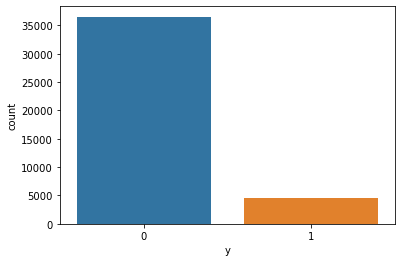

In [92]:
sns.countplot(W['y'])

In [93]:
W['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [94]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [95]:
pip install Tensorflow

Note: you may need to restart the kernel to use updated packages.


In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
sm = SMOTE()
x_train_s, y_train_s = sm.fit_resample(x_train,y_train.ravel()) # first we balance the train data set and then
x_test_s, y_test_s = sm.fit_resample(x_test,y_test.ravel())    # we balance the test data set

In [98]:
print('after oversampling the shape of train_x: {}'.format(x_train_s.shape))
print('after oversampling the shape of train_y: {}'.format(y_train_s.shape))

after oversampling the shape of train_x: (65764, 116)
after oversampling the shape of train_y: (65764,)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

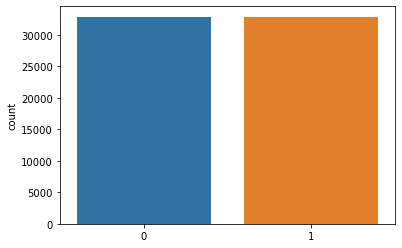

In [99]:
sns.countplot(y_train_s)

In [100]:
#Train the model
model = LogisticRegression(verbose=1)
model.fit(x_train_s, y_train_s)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


LogisticRegression(verbose=1)

In [101]:
#Test the model
predictions = model.predict(x_test_s)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test_s, predictions))

[0 0 0 ... 1 1 1]

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3666
           1       0.88      0.91      0.90      3666

    accuracy                           0.89      7332
   macro avg       0.89      0.89      0.89      7332
weighted avg       0.89      0.89      0.89      7332



In [106]:
y_train_s = pd.DataFrame(y_train_s, columns=['y'])

In [ ]:


# Section VI : Let's Improve the performance !
# Part 0 : What was your answer to Section - Part IV? Do you think class imbalance affects the model performance? Explore SMOTE implementation

# Part I : Make note of the performance from the last training
# Part II : Try implementing SMOTE to balance the two class labels
# Part III : Make note of the y label data now , what are the rations now ?

# Section VII : Let us Re-Train!
# Part I : Explore what RFE means
# Part II : Implement your training process inside the RFE
# Part III : What are the best columns that your RFE found? Please make a list of it

# Section VIII : Training time !
# Now that you have found the best columns for this problem

# Part I : Now train the model with the new data you have created after the RFE
# Part II : Create the prediction system to get the metrics such as accuracy

# Section IX : Additional Metrics
# Accuracy is not always the best metric

# Part I : Explore what Confusion Matrix means
# Part II : Create the confusion matrix for the predictions and make note of the outputs
# Part III : Create a classification report and make note of various outputs

# Section X : What's next?
# Part I : Make a note of difference in performance?
# # Part II : Can you recommend more improvements that could give much better results in all metrics?

In [107]:
y_train_s['y'].value_counts()

0    32882
1    32882
Name: y, dtype: int64